## 추후 제거
* 중복 데이터(모든값이 일치하는 행) 제거
* 분류기 모형선택 방법을 통해 확인진행후(10번 진행이후에는 ran초과사용으로 튕겨서 더이상 못함) 모형 선택
* 비파괴 당도 제거(훈련용,테스트용 둘다)
* 정확도 = 0.4434
* 평균제곱오차 = 0.96
* f1스코어 = 0.44
* 정밀도 = 0.44
* 재현율 = 0.44


## 훈련용 데이터 전처리


In [1]:
# 각종 라이브러리 가져오기
from sklearn.preprocessing import LabelEncoder # 라벨인코더(문자형데이터를 숫자형으로 변환하기 위해 사용)
# from sklearn.model_selection import train_test_split # 사용안함(사용할려면 훈련용을 훈련용과 테스트용으로 나누거나 결정필요)
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, r2_score, f1_score, precision_score, recall_score # 혼동행렬 생성함수, 평균제곱오차, 정확도, 결정계수(R스퀘어), f1점수, 정밀도, 재현율
from sklearn.ensemble import AdaBoostClassifier # 인공지능 모델

# 보조 라이브러리
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 맷플롯립에서 폰트매지저(글꼴 관리자)를 가져온다.
import matplotlib.font_manager as fm

# 폰트 파일 설치
!apt-get -qq -y install fonts-nanum > /dev/null

# 글꼴 선택.
fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareRound.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

fm._rebuild()

# 맷플롯립에서 사용할 글꼴 지정
mpl.rc('font', family='NanumSquareRound') 
plt.rc('font', family='NanumSquareRound') 

# 그래프 축에서 음수 부호를 쓸 수 있게 구성
mpl.rc('axes', unicode_minus=False)
plt.rc('axes', unicode_minus=False)

In [3]:
# 구글 드라이브 마운트
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 불러올 파일 위치 지정
%cd /content/drive/MyDrive/이미지 좌표2

/content/drive/MyDrive/이미지 좌표2


In [5]:
# 사과 환경데이터 가져오기
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')

In [6]:
# 사과 이미지데이터 가져오기
train_img = pd.read_csv('trainimg.csv')
val_img = pd.read_csv('valimg.csv')

In [7]:
train = train.sort_values('img_file_name')
val = val.sort_values('img_file_name')
train = train.reset_index()
val = val.reset_index()
train = train.drop(['index'], axis = 1)
val = val.drop(['index'], axis = 1)

In [8]:
train_img = train_img.drop(['Unnamed: 0'], axis= 1)
val_img = val_img.drop(['Unnamed: 0'], axis= 1)
train = train.drop(['Unnamed: 0'], axis = 1)
val = val.drop(['Unnamed: 0'], axis = 1)

In [9]:
# 데이터 구성 확인
train

,type,apple_kind,position,obj_num,sugar_content,sugar_content_nir,tod_attribute,tod_temper,soil_ec,soil_temper,...,img_angle,licenses_id,licenses_name,img_file_name,img_height,img_width,area,sugar_grade,segmentation,bbox
0,jpg,HR,F04,13,NaN,9.7,FLIR C3X,23.9,1.33,24.17,...,0.0,1.0,apple01,20210816_RGB_09.7_F04_HR_05_013_03_0_A.jpg,2208.0,2208.0,1428493.0,C,"[370.0, 941.25, 491.25, 797.5, 650.0, 713.75, ...","[322.0, 695.0, 1337.0, 1312.0]"
1,jpg,HR,F11,27,NaN,10.2,FLIR C3X,31.1,0.44,22.20,...,0.0,1.0,apple01,20210816_RGB_10.2_F11_HR_02_027_01_0_A.jpg,3024.0,3024.0,576228.0,C,"[1191.9032258064517, 1299.1290322580646, 1159....","[1146.0, 1170.0, 892.0, 801.0]"
2,jpg,HR,F04,12,NaN,10.3,FLIR C3X,22.9,1.33,24.17,...,270.0,1.0,apple01,20210816_RGB_10.3_F04_HR_02_012_05_270_A.jpg,2208.0,2208.0,1538639.0,C,"[1615.034482758621, 694.0344827586207, 1549.51...","[332.0, 335.0, 1384.0, 1442.0]"
3,jpg,HR,F05,20,NaN,10.4,FLIR C3X,25.9,0.04,22.30,...,0.0,1.0,apple01,20210816_RGB_10.4_F05_HR_03_020_04_0_A.jpg,3024.0,3024.0,752658.0,C,"[1969.9523809523812, 1245.5238095238096, 1903....","[1115.0, 1024.0, 913.0, 1058.0]"
4,jpg,HR,F09,18,NaN,10.4,NaN,NaN,0.05,22.24,...,270.0,1.0,apple01,20210816_RGB_10.4_F09_HR_03_018_05_270_A.jpg,3024.0,3024.0,1769372.0,C,"[2022.3333333333335, 1193.142857142857, 1955.6...","[503.0, 497.0, 1534.0, 1520.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,jpg,HJ,F06,2,12.7,14.9,FLIR C3X,13.2,0.86,9.50,...,45.0,1.0,apple01,20211106_RGB_14.9_F06_HJ_05_002_08_45_H.jpg,2560.0,1707.0,348104.0,A,"[673, 1490, 773, 1542, 833, 1561, 912, 1563, 9...","[558.0, 921.0, 683.0, 643.0]"
595,jpg,HJ,F06,11,15.2,17.8,FLIR C3X,10.8,0.86,9.50,...,0.0,1.0,apple01,20211106_RGB_17.8_F06_HJ_02_011_11_0_H.jpg,2560.0,1707.0,570956.0,A,"[632, 900, 588, 967, 552, 1039, 527, 1121, 519...","[519.0, 797.0, 864.0, 798.0]"
596,jpg,HJ,F06,60,NaN,18.0,FLIR C3X,10.6,0.86,9.50,...,0.0,1.0,apple01,20211106_RGB_18.0_F06_HJ_02_060_11_0_H.jpg,2560.0,1707.0,422917.0,A,"[850, 935, 794, 939, 737, 946, 703, 957, 677, ...","[543.0, 933.0, 752.0, 661.0]"
597,jpg,HJ,F06,46,NaN,18.2,FLIR C3X,10.5,0.86,9.50,...,0.0,1.0,apple01,20211106_RGB_18.2_F06_HJ_02_046_14_0_H.jpg,2560.0,1707.0,422680.0,A,"[792, 841, 745, 839, 699, 836, 674, 841, 640, ...","[433.0, 836.0, 749.0, 683.0]"


In [10]:
train_img = train_img.drop(['index'], axis = 1)
val_img = val_img.drop(['index'], axis = 1)

In [11]:
val_img

,segmentation,img_file_name
0,[761 761 761 ... 0 1 2],20210816_RGB_09.1_F07_HR_07_004_01_0_A.jpg
1,[761 761 761 ... 0 1 2],20210816_RGB_09.1_F07_HR_07_004_01_0_A.jpg
2,[972 972 972 ... 0 1 2],20210816_RGB_09.5_F12_AR_01_020_03_0_A.jpg
3,[972 972 972 ... 0 1 2],20210816_RGB_09.5_F12_AR_01_020_03_0_A.jpg
4,[615 615 615 ... 0 1 2],20210816_RGB_10.3_F04_HR_04_013_04_0_A.jpg
...,...,...
475,[915 915 915 ... 0 1 2],20211030_RGB_14.0_F14_HJ_02_002_04_0_H.jpg
476,[871 871 871 ... 0 1 2],20211030_RGB_14.1_F13_HJ_03_070_13_0_H.jpg
477,[859 859 859 ... 0 1 2],20211030_RGB_14.2_F13_HJ_02_044_01_0_H.jpg
478,[857 857 857 ... 0 1 2],20211106_RGB_16.8_F06_HJ_02_079_13_0_H.jpg


In [12]:
#데이터 프레임 통합
train = pd.merge(train, train_img , on ='img_file_name')
val = pd.merge(val, val_img, on ='img_file_name')

In [13]:
train

,type,apple_kind,position,obj_num,sugar_content,sugar_content_nir,tod_attribute,tod_temper,soil_ec,soil_temper,...,licenses_id,licenses_name,img_file_name,img_height,img_width,area,sugar_grade,segmentation_x,bbox,segmentation_y
0,jpg,HR,F04,13,NaN,9.7,FLIR C3X,23.9,1.33,24.17,...,1.0,apple01,20210816_RGB_09.7_F04_HR_05_013_03_0_A.jpg,2208.0,2208.0,1428493.0,C,"[370.0, 941.25, 491.25, 797.5, 650.0, 713.75, ...","[322.0, 695.0, 1337.0, 1312.0]",[709 709 709 ... 0 1 2]
1,jpg,HR,F11,27,NaN,10.2,FLIR C3X,31.1,0.44,22.20,...,1.0,apple01,20210816_RGB_10.2_F11_HR_02_027_01_0_A.jpg,3024.0,3024.0,576228.0,C,"[1191.9032258064517, 1299.1290322580646, 1159....","[1146.0, 1170.0, 892.0, 801.0]",[1182 1182 1182 ... 0 1 2]
2,jpg,HR,F04,12,NaN,10.3,FLIR C3X,22.9,1.33,24.17,...,1.0,apple01,20210816_RGB_10.3_F04_HR_02_012_05_270_A.jpg,2208.0,2208.0,1538639.0,C,"[1615.034482758621, 694.0344827586207, 1549.51...","[332.0, 335.0, 1384.0, 1442.0]",[345 345 345 ... 0 1 2]
3,jpg,HR,F05,20,NaN,10.4,FLIR C3X,25.9,0.04,22.30,...,1.0,apple01,20210816_RGB_10.4_F05_HR_03_020_04_0_A.jpg,3024.0,3024.0,752658.0,C,"[1969.9523809523812, 1245.5238095238096, 1903....","[1115.0, 1024.0, 913.0, 1058.0]",[1084 1084 1084 ... 0 1 2]
4,jpg,HR,F09,18,NaN,10.4,NaN,NaN,0.05,22.24,...,1.0,apple01,20210816_RGB_10.4_F09_HR_03_018_05_270_A.jpg,3024.0,3024.0,1769372.0,C,"[2022.3333333333335, 1193.142857142857, 1955.6...","[503.0, 497.0, 1534.0, 1520.0]",[504 504 504 ... 0 1 2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,jpg,HJ,F06,2,12.7,14.9,FLIR C3X,13.2,0.86,9.50,...,1.0,apple01,20211106_RGB_14.9_F06_HJ_05_002_08_45_H.jpg,2560.0,1707.0,348104.0,A,"[673, 1490, 773, 1542, 833, 1561, 912, 1563, 9...","[558.0, 921.0, 683.0, 643.0]",[925 925 925 ... 0 1 2]
542,jpg,HJ,F06,11,15.2,17.8,FLIR C3X,10.8,0.86,9.50,...,1.0,apple01,20211106_RGB_17.8_F06_HJ_02_011_11_0_H.jpg,2560.0,1707.0,570956.0,A,"[632, 900, 588, 967, 552, 1039, 527, 1121, 519...","[519.0, 797.0, 864.0, 798.0]",[814 814 814 ... 0 1 2]
543,jpg,HJ,F06,60,NaN,18.0,FLIR C3X,10.6,0.86,9.50,...,1.0,apple01,20211106_RGB_18.0_F06_HJ_02_060_11_0_H.jpg,2560.0,1707.0,422917.0,A,"[850, 935, 794, 939, 737, 946, 703, 957, 677, ...","[543.0, 933.0, 752.0, 661.0]",[940 940 940 ... 0 1 2]
544,jpg,HJ,F06,46,NaN,18.2,FLIR C3X,10.5,0.86,9.50,...,1.0,apple01,20211106_RGB_18.2_F06_HJ_02_046_14_0_H.jpg,2560.0,1707.0,422680.0,A,"[792, 841, 745, 839, 699, 836, 674, 841, 640, ...","[433.0, 836.0, 749.0, 683.0]",[880 880 880 ... 0 1 2]


In [14]:
val

,type,apple_kind,position,obj_num,sugar_content,sugar_content_nir,tod_attribute,tod_temper,soil_ec,soil_temper,...,licenses_id,licenses_name,img_file_name,img_height,img_width,area,sugar_grade,segmentation_x,bbox,segmentation_y
0,jpg,HR,F07,4,NaN,9.1,FLIR C3X,20.1,1.22,22.70,...,1.0,apple01,20210816_RGB_09.1_F07_HR_07_004_01_0_A.jpg,3456.0,3456.0,1861142.0,C,"[1751.3513513513515, 824.3243243243244, 1856.7...","[867.0, 748.0, 1509.0, 1550.0]",[761 761 761 ... 0 1 2]
1,jpg,HR,F07,4,NaN,9.1,FLIR C3X,20.1,1.22,22.70,...,1.0,apple01,20210816_RGB_09.1_F07_HR_07_004_01_0_A.jpg,3456.0,3456.0,1861142.0,C,"[1751.3513513513515, 824.3243243243244, 1856.7...","[867.0, 748.0, 1509.0, 1550.0]",[761 761 761 ... 0 1 2]
2,jpg,AR,F12,20,NaN,9.5,FLIR C3X,19.8,1.75,20.85,...,1.0,apple01,20210816_RGB_09.5_F12_AR_01_020_03_0_A.jpg,3472.0,3472.0,1733224.0,C,"[995.0, 1690.0, 1013.3333333333334, 1503.33333...","[995.0, 943.0, 1482.0, 1473.0]",[972 972 972 ... 0 1 2]
3,jpg,AR,F12,20,NaN,9.5,FLIR C3X,19.8,1.75,20.85,...,1.0,apple01,20210816_RGB_09.5_F12_AR_01_020_03_0_A.jpg,3472.0,3472.0,1733224.0,C,"[995.0, 1690.0, 1013.3333333333334, 1503.33333...","[995.0, 943.0, 1482.0, 1473.0]",[972 972 972 ... 0 1 2]
4,jpg,HR,F04,13,NaN,10.3,FLIR C3X,23.5,1.33,24.17,...,1.0,apple01,20210816_RGB_10.3_F04_HR_04_013_04_0_A.jpg,2208.0,2208.0,1618933.0,C,"[398.2857142857142, 752.1904761904763, 326.857...","[226.0, 578.0, 1451.0, 1420.0]",[615 615 615 ... 0 1 2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,jpg,HJ,F14,2,12.0,14.0,FLIR C3X,16.2,0.61,9.66,...,1.0,apple01,20211030_RGB_14.0_F14_HJ_02_002_04_0_H.jpg,2560.0,1707.0,511166.0,A,"[1168, 925, 1133, 925, 1092, 921, 1061, 921, 1...","[585.0, 903.0, 842.0, 720.0]",[915 915 915 ... 0 1 2]
454,jpg,HJ,F13,70,NaN,14.1,FLIR C3X,15.8,1.77,10.10,...,1.0,apple01,20211030_RGB_14.1_F13_HJ_03_070_13_0_H.jpg,2560.0,1707.0,538742.0,A,"[514, 1122, 541, 1047, 571, 980, 612, 929, 657...","[494.0, 847.0, 835.0, 767.0]",[871 871 871 ... 0 1 2]
455,jpg,HJ,F13,44,NaN,14.2,FLIR C3X,12.1,1.77,10.10,...,1.0,apple01,20211030_RGB_14.2_F13_HJ_02_044_01_0_H.jpg,2560.0,1707.0,503244.0,A,"[970, 869, 1076, 896, 1131, 912, 1167, 922, 12...","[479.0, 848.0, 803.0, 757.0]",[859 859 859 ... 0 1 2]
456,jpg,HJ,F06,79,NaN,16.8,FLIR C3X,10.4,0.86,9.50,...,1.0,apple01,20211106_RGB_16.8_F06_HJ_02_079_13_0_H.jpg,2560.0,1707.0,510188.0,A,"[1090, 879, 1044, 874, 994, 870, 936, 864, 878...","[510.0, 848.0, 829.0, 746.0]",[857 857 857 ... 0 1 2]


In [15]:
# 전처리를 위해 훈련용과 검증용 통합
total = pd.concat([train,val], axis = 0, ignore_index = True)

In [16]:
total

,type,apple_kind,position,obj_num,sugar_content,sugar_content_nir,tod_attribute,tod_temper,soil_ec,soil_temper,...,licenses_id,licenses_name,img_file_name,img_height,img_width,area,sugar_grade,segmentation_x,bbox,segmentation_y
0,jpg,HR,F04,13,NaN,9.7,FLIR C3X,23.9,1.33,24.17,...,1.0,apple01,20210816_RGB_09.7_F04_HR_05_013_03_0_A.jpg,2208.0,2208.0,1428493.0,C,"[370.0, 941.25, 491.25, 797.5, 650.0, 713.75, ...","[322.0, 695.0, 1337.0, 1312.0]",[709 709 709 ... 0 1 2]
1,jpg,HR,F11,27,NaN,10.2,FLIR C3X,31.1,0.44,22.20,...,1.0,apple01,20210816_RGB_10.2_F11_HR_02_027_01_0_A.jpg,3024.0,3024.0,576228.0,C,"[1191.9032258064517, 1299.1290322580646, 1159....","[1146.0, 1170.0, 892.0, 801.0]",[1182 1182 1182 ... 0 1 2]
2,jpg,HR,F04,12,NaN,10.3,FLIR C3X,22.9,1.33,24.17,...,1.0,apple01,20210816_RGB_10.3_F04_HR_02_012_05_270_A.jpg,2208.0,2208.0,1538639.0,C,"[1615.034482758621, 694.0344827586207, 1549.51...","[332.0, 335.0, 1384.0, 1442.0]",[345 345 345 ... 0 1 2]
3,jpg,HR,F05,20,NaN,10.4,FLIR C3X,25.9,0.04,22.30,...,1.0,apple01,20210816_RGB_10.4_F05_HR_03_020_04_0_A.jpg,3024.0,3024.0,752658.0,C,"[1969.9523809523812, 1245.5238095238096, 1903....","[1115.0, 1024.0, 913.0, 1058.0]",[1084 1084 1084 ... 0 1 2]
4,jpg,HR,F09,18,NaN,10.4,NaN,NaN,0.05,22.24,...,1.0,apple01,20210816_RGB_10.4_F09_HR_03_018_05_270_A.jpg,3024.0,3024.0,1769372.0,C,"[2022.3333333333335, 1193.142857142857, 1955.6...","[503.0, 497.0, 1534.0, 1520.0]",[504 504 504 ... 0 1 2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,jpg,HJ,F14,2,12.0,14.0,FLIR C3X,16.2,0.61,9.66,...,1.0,apple01,20211030_RGB_14.0_F14_HJ_02_002_04_0_H.jpg,2560.0,1707.0,511166.0,A,"[1168, 925, 1133, 925, 1092, 921, 1061, 921, 1...","[585.0, 903.0, 842.0, 720.0]",[915 915 915 ... 0 1 2]
1000,jpg,HJ,F13,70,NaN,14.1,FLIR C3X,15.8,1.77,10.10,...,1.0,apple01,20211030_RGB_14.1_F13_HJ_03_070_13_0_H.jpg,2560.0,1707.0,538742.0,A,"[514, 1122, 541, 1047, 571, 980, 612, 929, 657...","[494.0, 847.0, 835.0, 767.0]",[871 871 871 ... 0 1 2]
1001,jpg,HJ,F13,44,NaN,14.2,FLIR C3X,12.1,1.77,10.10,...,1.0,apple01,20211030_RGB_14.2_F13_HJ_02_044_01_0_H.jpg,2560.0,1707.0,503244.0,A,"[970, 869, 1076, 896, 1131, 912, 1167, 922, 12...","[479.0, 848.0, 803.0, 757.0]",[859 859 859 ... 0 1 2]
1002,jpg,HJ,F06,79,NaN,16.8,FLIR C3X,10.4,0.86,9.50,...,1.0,apple01,20211106_RGB_16.8_F06_HJ_02_079_13_0_H.jpg,2560.0,1707.0,510188.0,A,"[1090, 879, 1044, 874, 994, 870, 936, 864, 878...","[510.0, 848.0, 829.0, 746.0]",[857 857 857 ... 0 1 2]


In [17]:
# 필요없는 열 제거(구분, 데이터셋 타입, 촬영농가위치, 파괴당도, 촬영 각도, 라이센스 고유번호, 라이센스 이름, 원천데이터(이미지) 이름, 이미지 세로크기, 이미지 가로크기, 
# 어노테이션 면적, 세그멘테이션 좌표, 바운딩박스 정보, 촬영거리, 비파괴 당도)
total = total.drop(['type','position','sugar_content','img_angle','licenses_id','licenses_name','img_height','img_width','area','segmentation_x','bbox',
                          'img_dist','sugar_content_nir'], axis= 1)

In [18]:
# 필요없는 데이터 제거여부 확인
total

,apple_kind,obj_num,tod_attribute,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sunrise_time,sunset_time,img_attribute,img_time,img_file_name,sugar_grade,segmentation_y
0,HR,13,FLIR C3X,23.9,1.33,24.17,19.70,-0.1,27.76,55.98,709.0,05:38,19:19,Iphone 7,2021-08-16,20210816_RGB_09.7_F04_HR_05_013_03_0_A.jpg,C,[709 709 709 ... 0 1 2]
1,HR,27,FLIR C3X,31.1,0.44,22.20,6.42,-0.1,25.19,65.87,601.0,05:38,19:19,Iphone 12 Pro Max,2021-08-16,20210816_RGB_10.2_F11_HR_02_027_01_0_A.jpg,C,[1182 1182 1182 ... 0 1 2]
2,HR,12,FLIR C3X,22.9,1.33,24.17,19.70,-0.1,27.76,55.98,709.0,05:38,19:19,Iphone 7,2021-08-16,20210816_RGB_10.3_F04_HR_02_012_05_270_A.jpg,C,[345 345 345 ... 0 1 2]
3,HR,20,FLIR C3X,25.9,0.04,22.30,6.40,-0.1,23.24,70.62,191.0,05:38,19:19,Iphone 7,2021-08-16,20210816_RGB_10.4_F05_HR_03_020_04_0_A.jpg,C,[1084 1084 1084 ... 0 1 2]
4,HR,18,NaN,NaN,0.05,22.24,7.14,-0.1,23.91,70.33,194.0,05:34,19:25,LM-V500N,2021-08-16,20210816_RGB_10.4_F09_HR_03_018_05_270_A.jpg,C,[504 504 504 ... 0 1 2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,HJ,2,FLIR C3X,16.2,0.61,9.66,12.48,-153.2,14.06,66.31,269.0,06:45,17:30,SM-N960N,2021-10-30,20211030_RGB_14.0_F14_HJ_02_002_04_0_H.jpg,A,[915 915 915 ... 0 1 2]
1000,HJ,70,FLIR C3X,15.8,1.77,10.10,12.21,-51.0,10.55,85.18,256.0,06:45,17:30,SM-N960N,2021-10-30,20211030_RGB_14.1_F13_HJ_03_070_13_0_H.jpg,A,[871 871 871 ... 0 1 2]
1001,HJ,44,FLIR C3X,12.1,1.77,10.10,12.21,-51.0,10.55,85.18,256.0,06:45,17:30,SM-N960N,2021-10-30,20211030_RGB_14.2_F13_HJ_02_044_01_0_H.jpg,A,[859 859 859 ... 0 1 2]
1002,HJ,79,FLIR C3X,10.4,0.86,9.50,6.51,-0.7,11.46,84.88,290.0,06:52,17:23,SM-N960N,2021-11-06,20211106_RGB_16.8_F06_HJ_02_079_13_0_H.jpg,A,[857 857 857 ... 0 1 2]


In [19]:
total = total.drop(['img_file_name'], axis= 1)

In [20]:
# 원핫 인코딩 진행(적외선 촬영장비명, 사진촬영장비명, 사과종류, 사진촬영일시, 일출시간, 일몰시간)
total = pd.get_dummies(data = total, columns = ['apple_kind'], prefix = 'apple_kind')
total = pd.get_dummies(data = total, columns = ['tod_attribute'], prefix = 'tod_attribute')
total = pd.get_dummies(data = total, columns = ['img_attribute'], prefix = 'img_attribute')
total = pd.get_dummies(data = total, columns = ['img_time'], prefix = 'img_time')
total = pd.get_dummies(data = total, columns = ['sunset_time'], prefix = 'sunset_time')
total = pd.get_dummies(data = total, columns = ['sunrise_time'], prefix = 'sunrise_time')
total = pd.get_dummies(data = total, columns = ['segmentation_y'], prefix = 'segmentation')

In [21]:
#원핫 인코딩 진행결과 확인
total

,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sugar_grade,...,segmentation_[990 990 990 ... 0 1 2],segmentation_[991 991 991 ... 0 1 2],segmentation_[992 992 992 ... 0 1 2],segmentation_[993 993 993 ... 0 1 2],segmentation_[994 994 994 ... 0 1 2],segmentation_[995 995 995 ... 0 1 2],segmentation_[996 996 996 ... 0 1 2],segmentation_[997 997 997 ... 0 1 2],segmentation_[998 998 998 ... 0 1 2],segmentation_[999 999 999 ... 0 1 2]
0,13,23.9,1.33,24.17,19.70,-0.1,27.76,55.98,709.0,C,...,0,0,0,0,0,0,0,0,0,0
1,27,31.1,0.44,22.20,6.42,-0.1,25.19,65.87,601.0,C,...,0,0,0,0,0,0,0,0,0,0
2,12,22.9,1.33,24.17,19.70,-0.1,27.76,55.98,709.0,C,...,0,0,0,0,0,0,0,0,0,0
3,20,25.9,0.04,22.30,6.40,-0.1,23.24,70.62,191.0,C,...,0,0,0,0,0,0,0,0,0,0
4,18,NaN,0.05,22.24,7.14,-0.1,23.91,70.33,194.0,C,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2,16.2,0.61,9.66,12.48,-153.2,14.06,66.31,269.0,A,...,0,0,0,0,0,0,0,0,0,0
1000,70,15.8,1.77,10.10,12.21,-51.0,10.55,85.18,256.0,A,...,0,0,0,0,0,0,0,0,0,0
1001,44,12.1,1.77,10.10,12.21,-51.0,10.55,85.18,256.0,A,...,0,0,0,0,0,0,0,0,0,0
1002,79,10.4,0.86,9.50,6.51,-0.7,11.46,84.88,290.0,A,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train = total.iloc[:546,:]
val = total.iloc[546:,:]

In [23]:
train

,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sugar_grade,...,segmentation_[990 990 990 ... 0 1 2],segmentation_[991 991 991 ... 0 1 2],segmentation_[992 992 992 ... 0 1 2],segmentation_[993 993 993 ... 0 1 2],segmentation_[994 994 994 ... 0 1 2],segmentation_[995 995 995 ... 0 1 2],segmentation_[996 996 996 ... 0 1 2],segmentation_[997 997 997 ... 0 1 2],segmentation_[998 998 998 ... 0 1 2],segmentation_[999 999 999 ... 0 1 2]
0,13,23.9,1.33,24.17,19.70,-0.1,27.76,55.98,709.0,C,...,0,0,0,0,0,0,0,0,0,0
1,27,31.1,0.44,22.20,6.42,-0.1,25.19,65.87,601.0,C,...,0,0,0,0,0,0,0,0,0,0
2,12,22.9,1.33,24.17,19.70,-0.1,27.76,55.98,709.0,C,...,0,0,0,0,0,0,0,0,0,0
3,20,25.9,0.04,22.30,6.40,-0.1,23.24,70.62,191.0,C,...,0,0,0,0,0,0,0,0,0,0
4,18,NaN,0.05,22.24,7.14,-0.1,23.91,70.33,194.0,C,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2,13.2,0.86,9.50,6.51,-0.7,11.46,84.88,290.0,A,...,0,0,0,0,0,0,0,0,0,0
542,11,10.8,0.86,9.50,6.51,-0.7,11.46,84.88,290.0,A,...,0,0,0,0,0,0,0,0,0,0
543,60,10.6,0.86,9.50,6.51,-0.7,11.46,84.88,290.0,A,...,0,0,0,0,0,0,0,0,0,0
544,46,10.5,0.86,9.50,6.51,-0.7,11.46,84.88,290.0,A,...,0,0,0,0,0,0,0,0,0,0


In [24]:
val

,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sugar_grade,...,segmentation_[990 990 990 ... 0 1 2],segmentation_[991 991 991 ... 0 1 2],segmentation_[992 992 992 ... 0 1 2],segmentation_[993 993 993 ... 0 1 2],segmentation_[994 994 994 ... 0 1 2],segmentation_[995 995 995 ... 0 1 2],segmentation_[996 996 996 ... 0 1 2],segmentation_[997 997 997 ... 0 1 2],segmentation_[998 998 998 ... 0 1 2],segmentation_[999 999 999 ... 0 1 2]
546,4,20.1,1.22,22.70,27.58,-0.2,26.88,60.44,789.0,C,...,0,0,0,0,0,0,0,0,0,0
547,4,20.1,1.22,22.70,27.58,-0.2,26.88,60.44,789.0,C,...,0,0,0,0,0,0,0,0,0,0
548,20,19.8,1.75,20.85,19.55,-0.1,26.02,61.67,406.0,C,...,0,0,0,0,0,0,0,0,0,0
549,20,19.8,1.75,20.85,19.55,-0.1,26.02,61.67,406.0,C,...,0,0,0,0,0,0,0,0,0,0
550,13,23.5,1.33,24.17,19.70,-0.1,27.76,55.98,709.0,C,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2,16.2,0.61,9.66,12.48,-153.2,14.06,66.31,269.0,A,...,0,0,0,0,0,0,0,0,0,0
1000,70,15.8,1.77,10.10,12.21,-51.0,10.55,85.18,256.0,A,...,0,0,0,0,0,0,0,0,0,0
1001,44,12.1,1.77,10.10,12.21,-51.0,10.55,85.18,256.0,A,...,0,0,0,0,0,0,0,0,0,0
1002,79,10.4,0.86,9.50,6.51,-0.7,11.46,84.88,290.0,A,...,0,0,0,0,0,0,0,0,0,0


In [25]:
val = val.reset_index()
val = val.drop(['index'], axis = 1)

In [26]:
val

,obj_num,tod_temper,soil_ec,soil_temper,soil_humidty,soil_potential,temperature,humidity,sunshine,sugar_grade,...,segmentation_[990 990 990 ... 0 1 2],segmentation_[991 991 991 ... 0 1 2],segmentation_[992 992 992 ... 0 1 2],segmentation_[993 993 993 ... 0 1 2],segmentation_[994 994 994 ... 0 1 2],segmentation_[995 995 995 ... 0 1 2],segmentation_[996 996 996 ... 0 1 2],segmentation_[997 997 997 ... 0 1 2],segmentation_[998 998 998 ... 0 1 2],segmentation_[999 999 999 ... 0 1 2]
0,4,20.1,1.22,22.70,27.58,-0.2,26.88,60.44,789.0,C,...,0,0,0,0,0,0,0,0,0,0
1,4,20.1,1.22,22.70,27.58,-0.2,26.88,60.44,789.0,C,...,0,0,0,0,0,0,0,0,0,0
2,20,19.8,1.75,20.85,19.55,-0.1,26.02,61.67,406.0,C,...,0,0,0,0,0,0,0,0,0,0
3,20,19.8,1.75,20.85,19.55,-0.1,26.02,61.67,406.0,C,...,0,0,0,0,0,0,0,0,0,0
4,13,23.5,1.33,24.17,19.70,-0.1,27.76,55.98,709.0,C,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,2,16.2,0.61,9.66,12.48,-153.2,14.06,66.31,269.0,A,...,0,0,0,0,0,0,0,0,0,0
454,70,15.8,1.77,10.10,12.21,-51.0,10.55,85.18,256.0,A,...,0,0,0,0,0,0,0,0,0,0
455,44,12.1,1.77,10.10,12.21,-51.0,10.55,85.18,256.0,A,...,0,0,0,0,0,0,0,0,0,0
456,79,10.4,0.86,9.50,6.51,-0.7,11.46,84.88,290.0,A,...,0,0,0,0,0,0,0,0,0,0


In [27]:
train.isnull().sum()

obj_num                                        0
tod_temper                                    38
soil_ec                                        0
soil_temper                                    0
soil_humidty                                   0
                                              ..
segmentation_[995 995 995 ...   0   1   2]     0
segmentation_[996 996 996 ...   0   1   2]     0
segmentation_[997 997 997 ...   0   1   2]     0
segmentation_[998 998 998 ...   0   1   2]     0
segmentation_[999 999 999 ...   0   1   2]     0
Length: 663, dtype: int64

In [28]:
val.isnull().sum()

obj_num                                        0
tod_temper                                    34
soil_ec                                        0
soil_temper                                    0
soil_humidty                                   0
                                              ..
segmentation_[995 995 995 ...   0   1   2]     0
segmentation_[996 996 996 ...   0   1   2]     0
segmentation_[997 997 997 ...   0   1   2]     0
segmentation_[998 998 998 ...   0   1   2]     0
segmentation_[999 999 999 ...   0   1   2]     0
Length: 663, dtype: int64

In [29]:
#결측값 제거
train = train.dropna()
val = val.dropna()

In [30]:
# train_X, train_y 분리
train_y = train['sugar_grade']
train_X = train.drop(['sugar_grade'], axis = 1)

val_y = val['sugar_grade']
val_X = val.drop(['sugar_grade'], axis = 1)

In [31]:
# train_y 데이터프레임 형태로 변환
train_y = pd.DataFrame(train_y)
val_y = pd.DataFrame(val_y)

## 목표값 라벨 인코딩

In [32]:
# 훈련용 목표값(당도등급)이 문자형이라 사용할 모델 학습에 사용이 제한되어 숫자형으로 변환
encoder = LabelEncoder()
encoder.fit(train_y)
train_y = encoder.transform(train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# 검증용 목표값(당도등급)이 문자형이라 사용할 모델 학습에 사용이 제한되어 숫자형으로 변환
encoder1 = LabelEncoder()
encoder1.fit(val_y)
val_y = encoder1.transform(val_y)

## 인공지능 모델 제작 및 학습

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
# 인공지능 모델 불러오기(배깅:데이터 중복을 허용해서 샘플링하여 훈련 세트의 서브셋을 구성하여 하나의 분류기를 다르게 학습시키는 인공지능 모델)
model = AdaBoostClassifier(n_estimators = 100, random_state = 80)

In [36]:
# 인공지능 모델 학습
model.fit(train_X, train_y)

AdaBoostClassifier(n_estimators=100, random_state=80)

In [37]:
#예측치 저장
예측치 = model.predict(val_X)

In [38]:
#실측치 저장
실측치 = val_y

In [39]:
# 예측치 확인
예측치

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 2, 0, 0,
       0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2,
       2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0,
       2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1,
       1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 2, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1,
       2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 0, 0,

In [40]:
#실측치 확인
실측치

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [41]:
# 평균제곱오차(0에 가까울수록 예측력이 좋음)
print('평균제곱오차: %.2f' % mean_squared_error(실측치, 예측치)) # f포맷팅방식 사용
# loss(손실) = cost(비용) = error(오차)

평균제곱오차: 0.96


In [42]:
# 정확도(전체 대비 정확하게 예측한 비율)
print(f'정확도 = {accuracy_score(실측치, 예측치): .4f}\n')

정확도 =  0.4434



In [44]:
# f1점수(정밀도와 재현율의 평균)
print('f1 score: %.2f' % f1_score(실측치, 예측치, average = 'micro'))

f1 score: 0.44


In [45]:
# 정밀도(예측을 positive로 한 대상중 예측과 실제값이 positive로 일치한 데이터의 비율))
print('정밀도: %.2f' % precision_score(실측치, 예측치, average = 'micro'))

정밀도: 0.44


In [46]:
# 재현율(실제값이 positive인 대상 중 예측값과 실제값이 positive로 일치한 데이터의 비율))
print('재현율: %.2f' % recall_score(실측치, 예측치, average = 'micro'))

재현율: 0.44


In [47]:
# 그런 다음에 혼동행렬(오차행렬)을 생성합니다. 
혼동행렬 = confusion_matrix(실측치, 예측치)
혼동행렬

array([[64, 33, 33],
       [40, 49, 61],
       [24, 45, 75]])

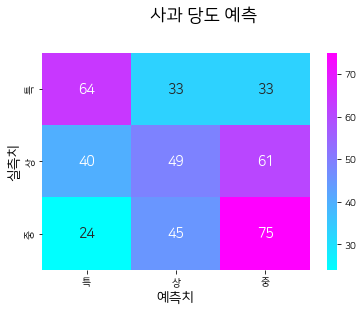

In [48]:
# 혼동행렬 히트맵으로 출력
등급 = ['특','상','중'] 

sns.heatmap(data = 혼동행렬, 
            annot=True,  # 각 상자안의 숫자를 표시할지 여부(기본값은 None으로 별도 입력하지않으면 나오지 않음)
            annot_kws={"size": 14}, # 각 상자 안에 글자를 14포인트로 표시.
            cmap= 'cool', # cmap그래프의 색깔지정
            xticklabels= 등급, # x축 눈금제목 지정 
            yticklabels= 등급, # y축 눈금제목 지정
            fmt = 'd') # 상자안의 숫자 전체 표시
plt.xlabel('예측치', fontsize=14) # x축 제목 지정
plt.ylabel('실측치', fontsize=14) # y축 제목 지정

plt.suptitle("사과 당도 예측", y=1.04, size=18) # 그래프 제목 지정
plt.show() # 출력